# Loading Libraries

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
os.listdir("/kaggle/input/heart-disease-dataset")

['heart.csv']

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Variable Explanation
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target 0=No Diseas 1=Disease

# Data Wrangling 
## Perliminary Observation
- There are no missing values in the dataset
- Datatypes can be adjusted for better preformance.
- Categorical data such as sex, chest pain, fasting blood sugar, exercise induced angina and thal can be changed to categorical for clarity and sample analysis
- Categorical data isnt balanced.

In [6]:
#ِAdjusting Datatypes
df['sex'] = df['sex'].astype("category")
df['cp'] = df['cp'].astype("category")
df['thal'] = df['thal'].astype("category")

df['fbs'] = df['fbs'].astype("bool")
df['exang'] = df['exang'].astype("bool")

In [7]:
df.replace({"sex":{0:'Female', 1:"Male"}},inplace=True)

In [8]:
#Renaming Columns for better readbility
df.rename(columns={"cp":"Chest_Pain",
          "trestbps":"Resting_BP",
          "fbs":"Fasting_Blood_sugar",
          "restecg":"Resting_Electrocardiographic_Results",
          "exang":"Exercise_Induced_Angina",
          "thalach":"Max_HR_Achieved"},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   1025 non-null   int64   
 1   sex                                   1025 non-null   category
 2   Chest_Pain                            1025 non-null   category
 3   Resting_BP                            1025 non-null   int64   
 4   chol                                  1025 non-null   int64   
 5   Fasting_Blood_sugar                   1025 non-null   bool    
 6   Resting_Electrocardiographic_Results  1025 non-null   int64   
 7   Max_HR_Achieved                       1025 non-null   int64   
 8   Exercise_Induced_Angina               1025 non-null   bool    
 9   oldpeak                               1025 non-null   float64 
 10  slope                                 1025 non-null   int64   
 11  ca  

In [10]:
df.head()

,age,sex,Chest_Pain,Resting_BP,chol,Fasting_Blood_sugar,Resting_Electrocardiographic_Results,Max_HR_Achieved,Exercise_Induced_Angina,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,False,1,168,False,1.0,2,2,3,0
1,53,Male,0,140,203,True,0,155,True,3.1,0,0,3,0
2,70,Male,0,145,174,False,1,125,True,2.6,0,0,3,0
3,61,Male,0,148,203,False,1,161,False,0.0,2,1,3,0
4,62,Female,0,138,294,True,1,106,False,1.9,1,3,2,0


# Data Exploration

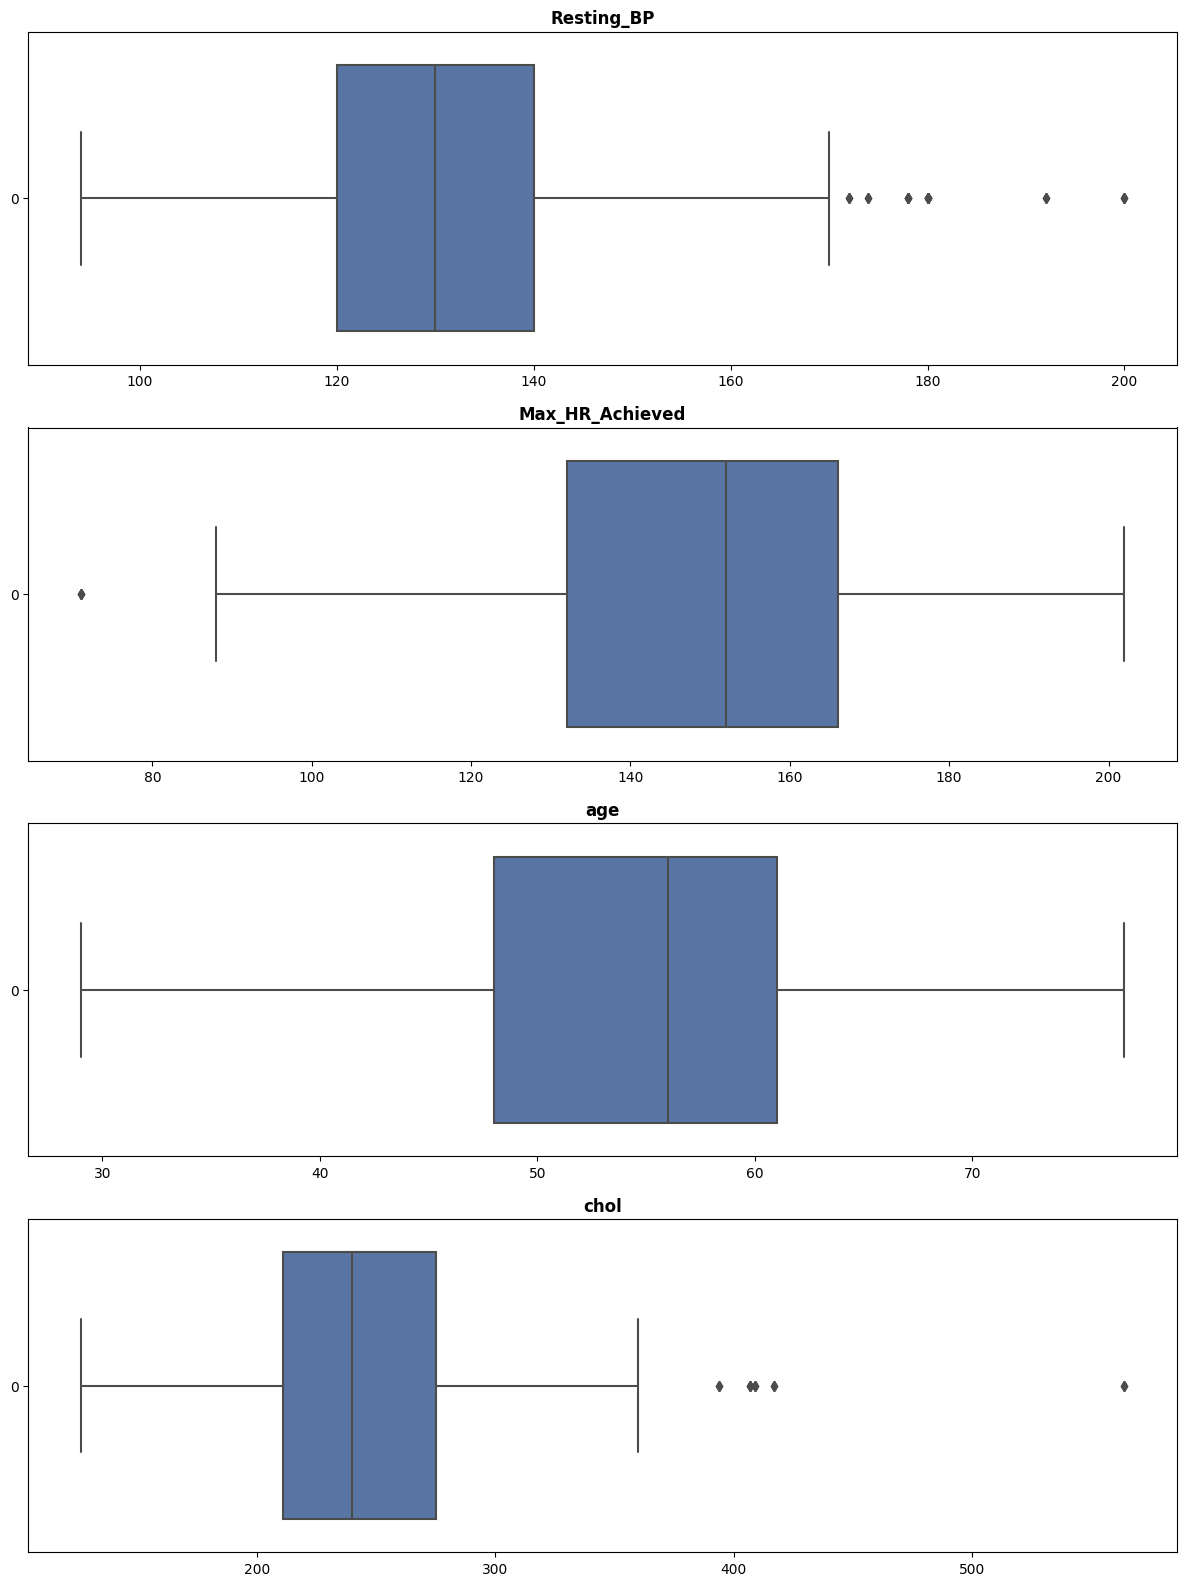

In [11]:
fig, axes = plt.subplots(4,1,figsize=(12,16))
tickers = ["Resting_BP","Max_HR_Achieved","age","chol"]

for n, ticker in enumerate(tickers):
    sns.set(style="whitegrid")
    sns.boxplot(df[tickers[n]],orient="h",ax=axes[n])
    axes[n].set_title(tickers[n],fontweight='bold')
fig.tight_layout(pad=1.0)
plt.show()

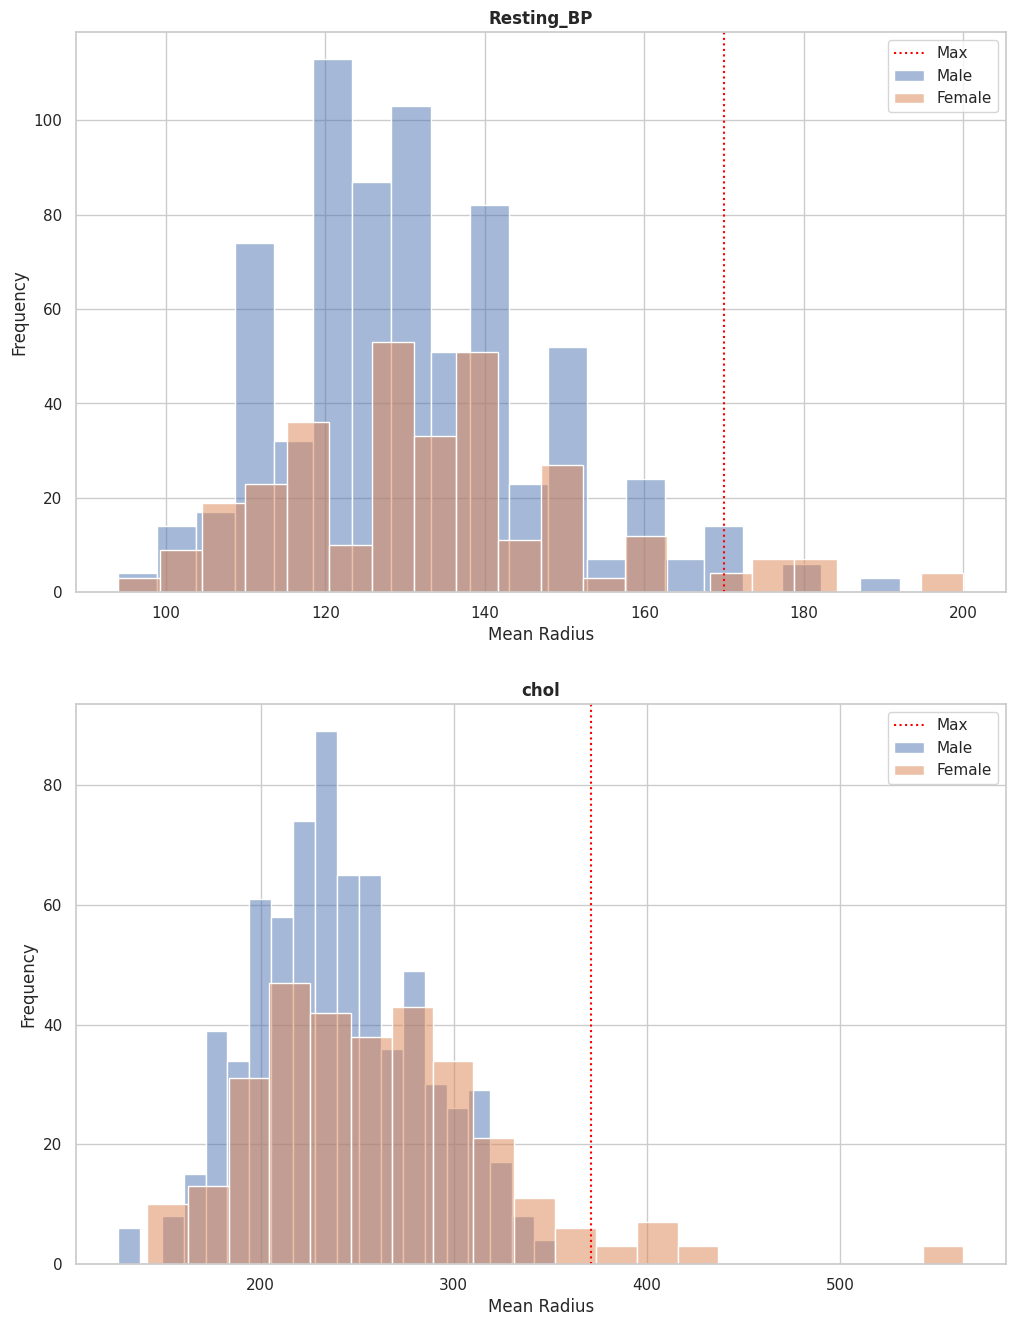

In [12]:
fig, axes = plt.subplots(2,1,figsize=(12,16))
tickers = ["Resting_BP","chol"]

for n, ticker in enumerate(tickers):
    Q1=np.percentile(df[ticker],25)
    Q3=np.percentile(df[ticker],75)
    IQR = Q3-Q1
    Max = Q3+(1.5*IQR)
    sns.histplot(df[df['sex']=='Male'].loc[:,ticker], bins=20, alpha=0.5, label='Male',ax=axes[n])
    sns.histplot(df[df['sex']=='Female'].loc[:,ticker], bins=20, alpha=0.5, label='Female',ax=axes[n])
    axes[n].set_xlabel('Mean Radius')
    axes[n].set_ylabel('Frequency')
    axes[n].axvline(Max,color="red",linestyle="dotted",label="Max")
    axes[n].legend(loc='upper right')
    axes[n].set_title(ticker,fontweight="bold")


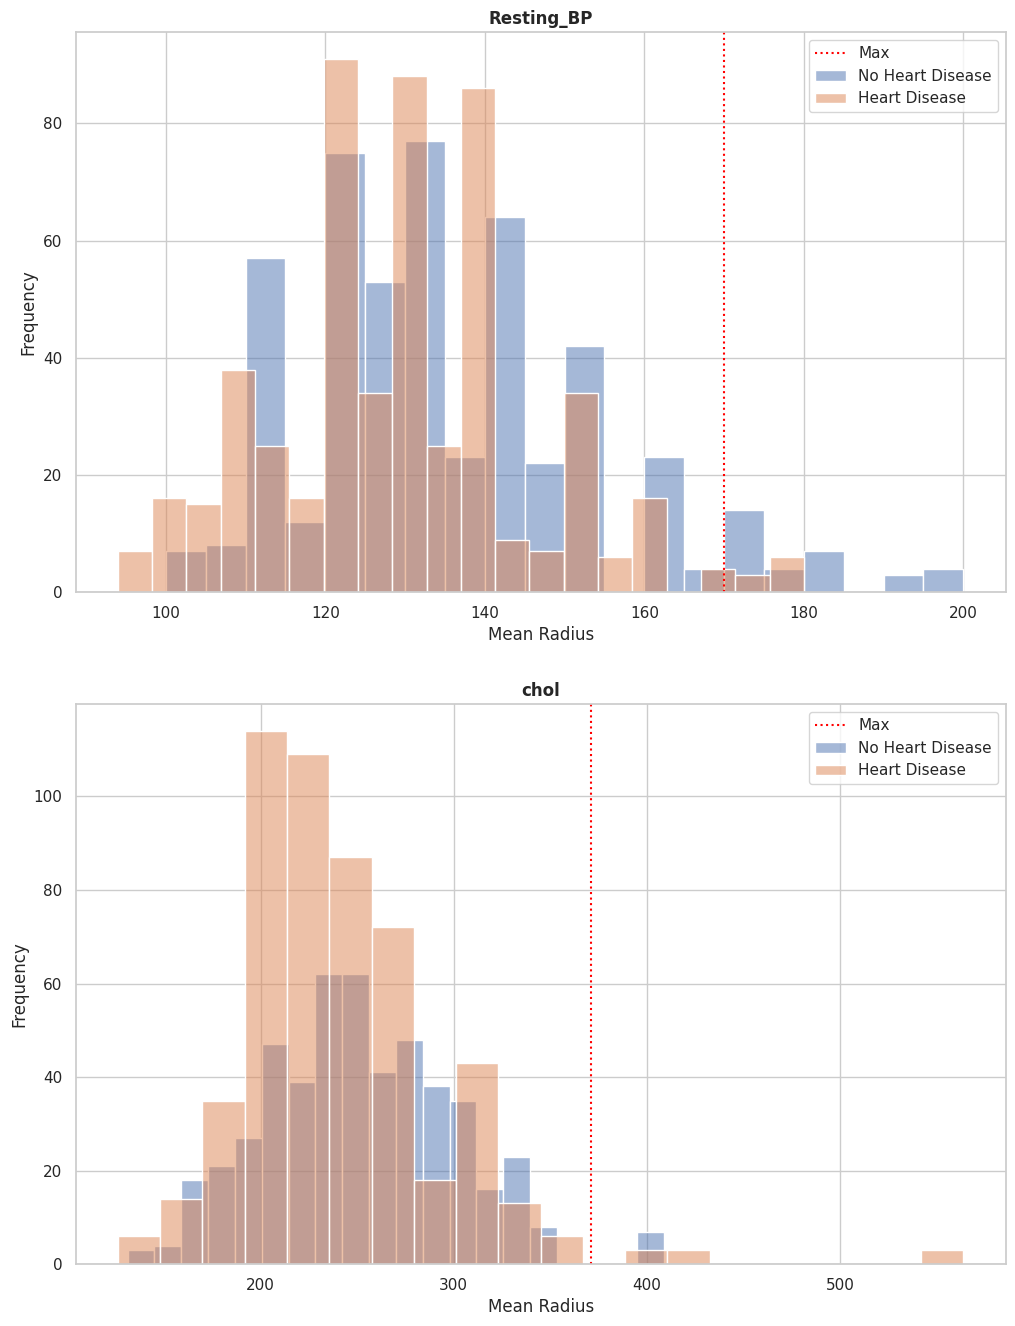

In [13]:
fig, axes = plt.subplots(2,1,figsize=(12,16))
tickers = ["Resting_BP","chol"]

for n, ticker in enumerate(tickers):
    Q1=np.percentile(df[ticker],25)
    Q3=np.percentile(df[ticker],75)
    IQR = Q3-Q1
    Max = Q3+(1.5*IQR)
    sns.histplot(df[df['target']==0].loc[:,ticker], bins=20, alpha=0.5, label='No Heart Disease',ax=axes[n])
    sns.histplot(df[df['target']==1].loc[:,ticker], bins=20, alpha=0.5, label='Heart Disease',ax=axes[n])
    axes[n].set_xlabel('Mean Radius')
    axes[n].set_ylabel('Frequency')
    axes[n].axvline(Max,color="red",linestyle="dotted",label="Max")
    axes[n].legend(loc='upper right')
    axes[n].set_title(ticker,fontweight="bold")

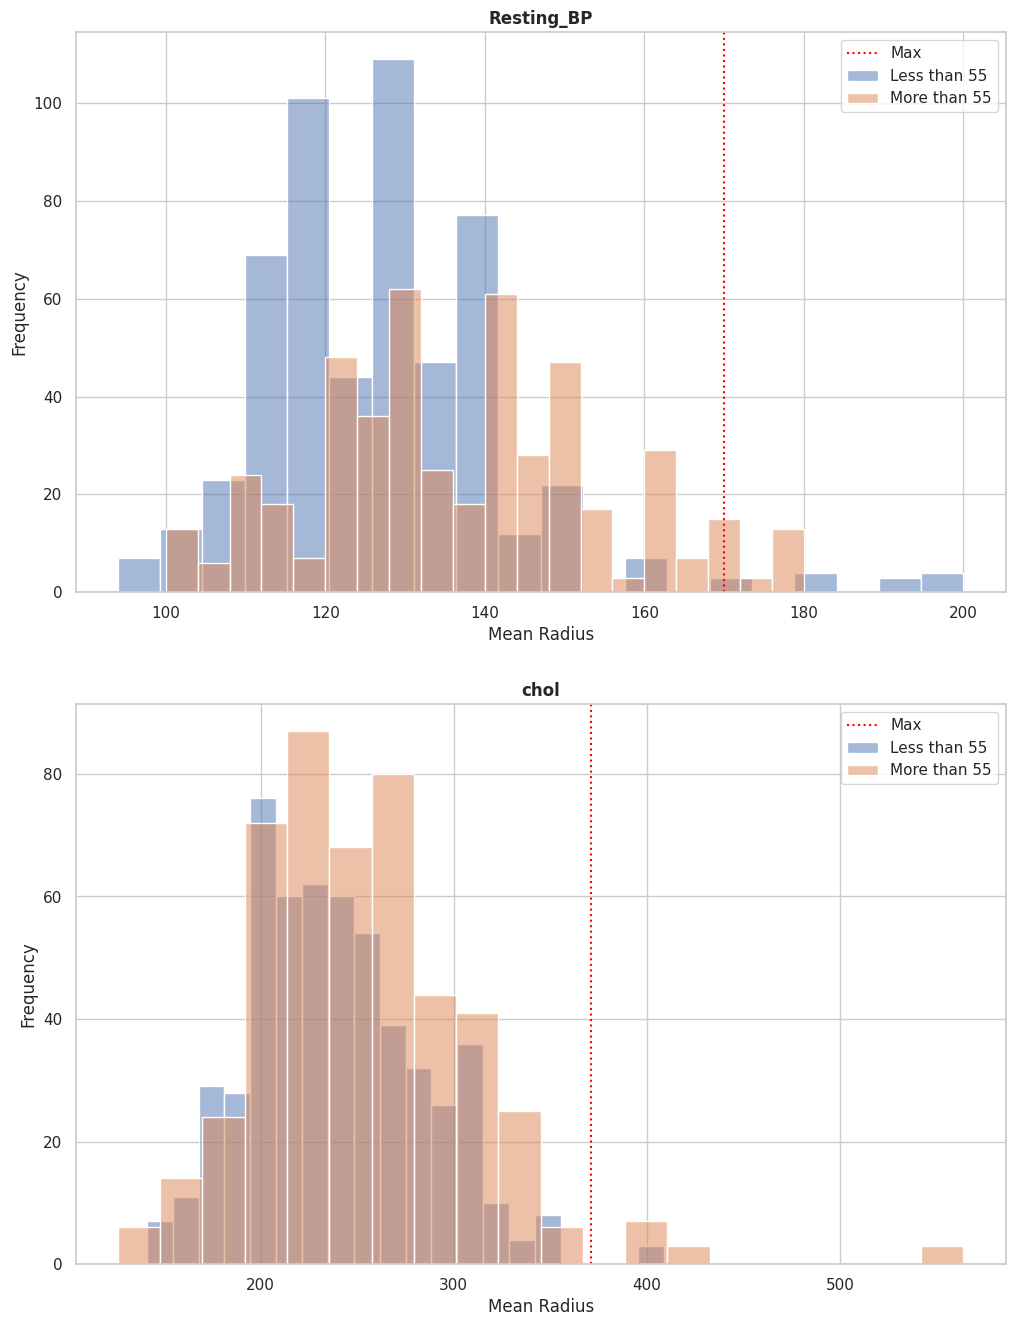

In [14]:
fig, axes = plt.subplots(2,1,figsize=(12,16))
tickers = ["Resting_BP","chol"]

for n, ticker in enumerate(tickers):
    Q1=np.percentile(df[ticker],25)
    Q3=np.percentile(df[ticker],75)
    IQR = Q3-Q1
    Max = Q3+(1.5*IQR)
    sns.histplot(df[df['age']<=56].loc[:,ticker], bins=20, alpha=0.5, label='Less than 55',ax=axes[n])
    sns.histplot(df[df['age']>56].loc[:,ticker], bins=20, alpha=0.5, label='More than 55',ax=axes[n])
    axes[n].set_xlabel('Mean Radius')
    axes[n].set_ylabel('Frequency')
    axes[n].axvline(Max,color="red",linestyle="dotted",label="Max")
    axes[n].legend(loc='upper right')
    axes[n].set_title(ticker,fontweight="bold")

## Correlation Analysis

In [15]:
sex = pd.get_dummies(df['sex'],prefix="sex")
cp = pd.get_dummies(df['Chest_Pain'],prefix="CP")
resteg = pd.get_dummies(df['Resting_Electrocardiographic_Results'],prefix="Rest_EG")
df1 = pd.concat([df, sex,cp,resteg], axis=1)
df1.drop(["sex","Chest_Pain","Resting_Electrocardiographic_Results","oldpeak","slope","ca","thal"],inplace=True,axis=1)
df1.head()

,age,Resting_BP,chol,Fasting_Blood_sugar,Max_HR_Achieved,Exercise_Induced_Angina,target,sex_Female,sex_Male,CP_0,CP_1,CP_2,CP_3,Rest_EG_0,Rest_EG_1,Rest_EG_2
0,52,125,212,False,168,False,0,False,True,True,False,False,False,False,True,False
1,53,140,203,True,155,True,0,False,True,True,False,False,False,True,False,False
2,70,145,174,False,125,True,0,False,True,True,False,False,False,False,True,False
3,61,148,203,False,161,False,0,False,True,True,False,False,False,False,True,False
4,62,138,294,True,106,False,0,True,False,True,False,False,False,False,True,False


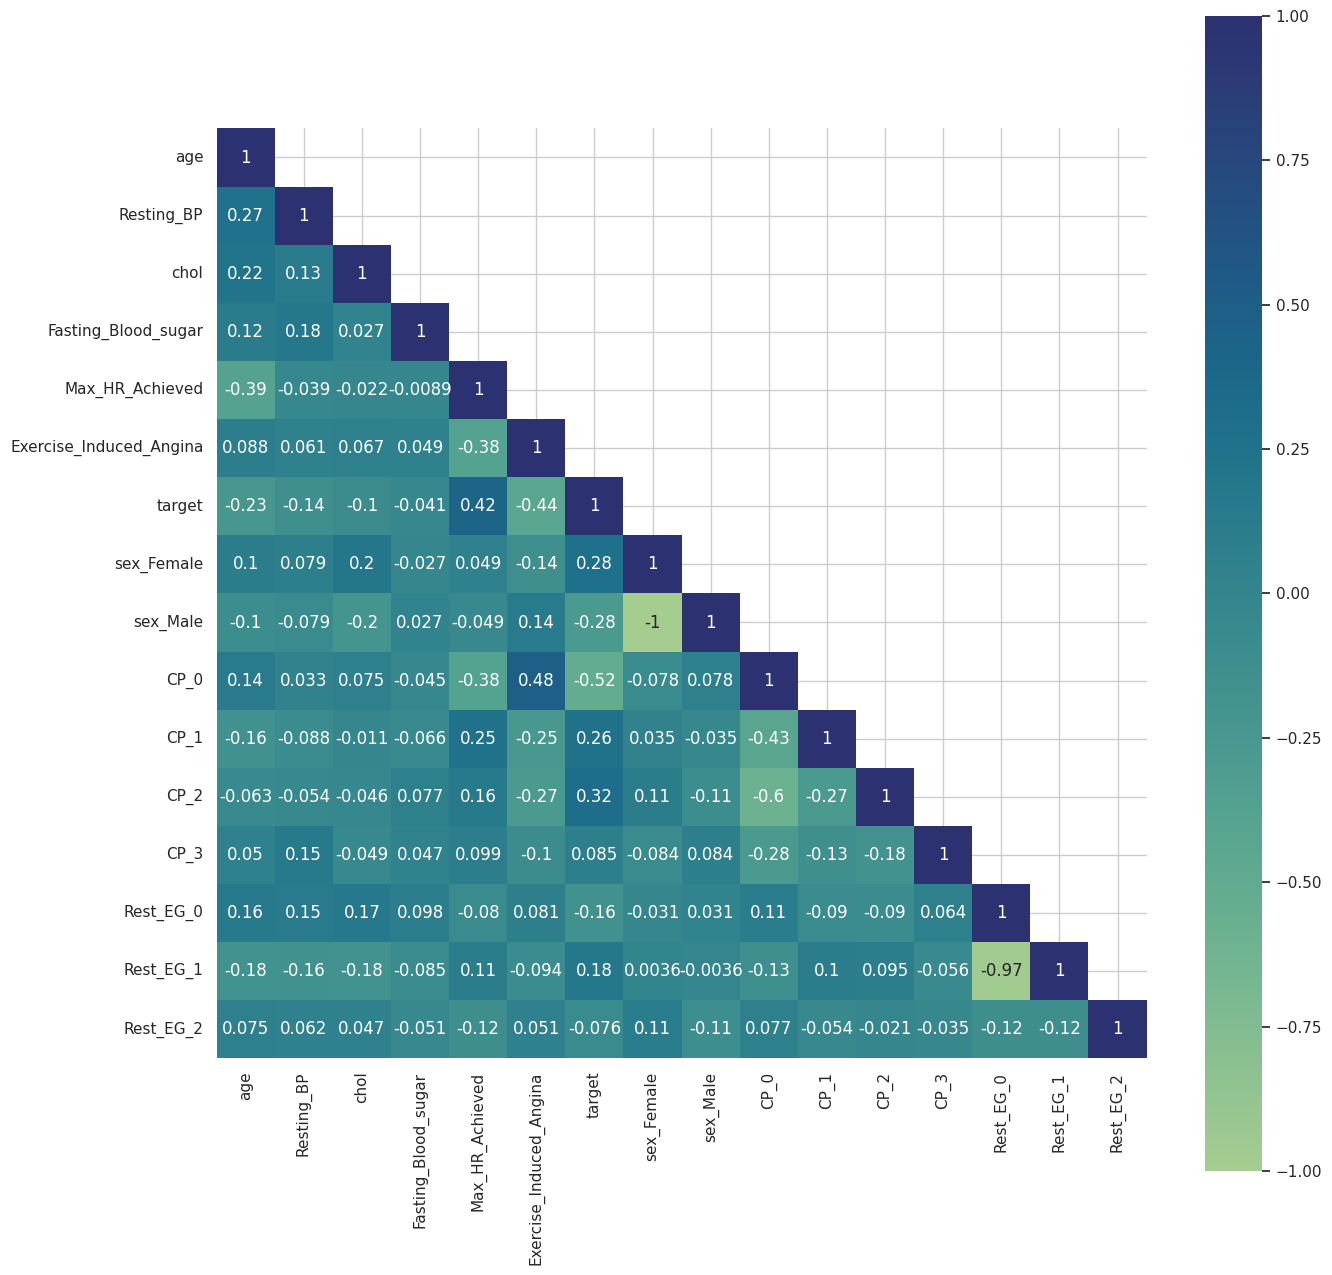

In [16]:
mask = np.triu(np.ones_like(df1.corr(), dtype=bool), k=1)

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True,mask=mask,  square=True, cmap='crest')
plt.show()

Some relationship between target and Chest Pain labeled as 0

## A/B Testing
Testing the statisitcal difference between those who have Chest Pain of 0 and not having heart disease

$H_0$ : $HDR_{CP_F}$ - $HDR_{CP_T}$ $=$ 0

$H_1$ : $HDR_{CP_F}$ - $HDR_{CP_T}$ $\neq$ 0

Given There is a negative correlation between CP0 and target I hypothesize that the average heart disease rate for those who have CP0 is different than those who did not have CP0. 

In [17]:
df2 = df1.loc[:,["CP_0","target"]]

In [18]:
df2.head()

,CP_0,target
0,True,0
1,True,0
2,True,0
3,True,0
4,True,0


In [19]:
df2.target.mean()

0.5131707317073171

In [20]:
obs_diff = df2.query("CP_0 == 0").target.mean() - df2.query("CP_0 != 0").target.mean()
print(f"The Heart Rate Disease in those that do not have Chest Pain 0 is {df2.query('CP_0 == 0').target.mean().round(2)}")
print(f"The Heart Rate Disease in those that do have Chest Pain 0 is {df2.query('CP_0 == 1').target.mean().round(2)}")
print(f"The observed difference between both sample is {obs_diff.round(2)}")

The Heart Rate Disease in those that do not have Chest Pain 0 is 0.77
The Heart Rate Disease in those that do have Chest Pain 0 is 0.25
The observed difference between both sample is 0.52


In [21]:
# Run 10,000 Sample to test the statistical signficane of that change
diffs = []
size = df2.shape[0]
for _ in range(10_000):
    exp_sample = df2.sample(size, replace=True)
    CP_False = exp_sample.query("CP_0 == 0").target.mean()
    CP_True = exp_sample.query("CP_0 != 0").target.mean()
    diffs.append(CP_False-CP_True)

In [22]:
diffs = np.array(diffs)

In [23]:
# Using the sample distrbution, we similuate the distrubution under the null hypothesis 
# by creating a random normal distrbution centered at 0 with the same spread and size
null_vals = np.random.normal(0, diffs.std(),diffs.size)

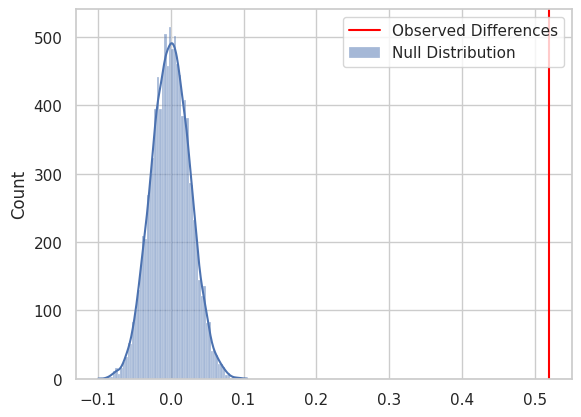

In [24]:
plt.axvline(obs_diff,color="red", label='Observed Differences')
sns.histplot(null_vals, kde=True, alpha=0.5,label='Null Distribution')
plt.legend(loc="upper right")

In [25]:
# Calculate p-value
obs_diff = np.mean(diffs)
p_value = np.mean(null_vals == obs_diff)
p_value_two_tailed = p_value * 2

# Calculate confidence interval
lower_bound = np.percentile(diffs, 2.5)
upper_bound = np.percentile(diffs, 97.5)

# Summary
print(f"Observed mean difference: {obs_diff.round(2)}")
print(f"P-value (two-tailed): {p_value_two_tailed}")
print(f"95% Confidence interval: [{lower_bound.round(2)}, {upper_bound.round(2)}]")

Observed mean difference: 0.52
P-value (two-tailed): 0.0
95% Confidence interval: [0.47, 0.57]


We can reject the null hypothesis that difference between the two samples is not equal to zero give that zero was not in our confidenc interval as well as our p-value is zero indicating a 95% confidence in the alternative hypothesis. 

# Data Modeling

In [26]:
df2.head()

,CP_0,target
0,True,0
1,True,0
2,True,0
3,True,0
4,True,0


In [27]:
X = df2[['CP_0']]
y = df2[['target']]

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
# Intercept (bias) term
intercept = logit_model.intercept_[0]

# Coefficients for each feature
coefficients = logit_model.coef_[0]

# Names of the features
feature_names = X.columns

# Print the model summary
print("Model Summary:")
print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Model Summary:
Intercept: 1.1790075542684335
Coefficients:
CP_0: -2.2673655209130104


In [30]:
predictions = logit_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.751219512195122
Precision: 0.7452830188679245
Recall: 0.7669902912621359
Confusion Matrix:
[[75 27]
 [24 79]]


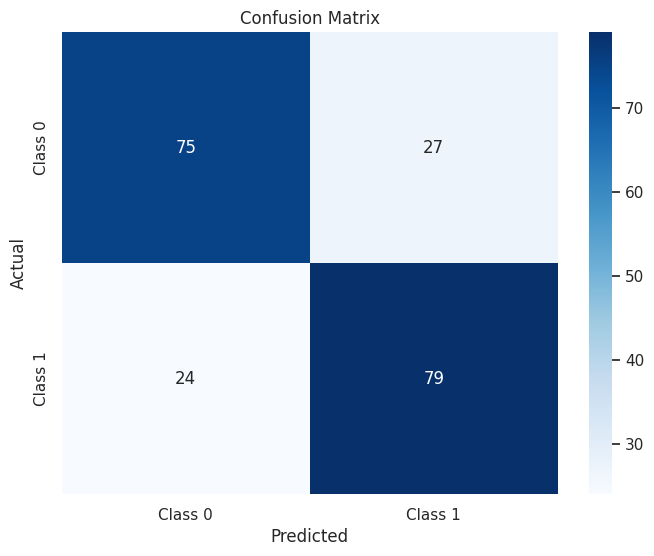

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()